In [2]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image    
import matplotlib.pyplot as plt
import numpy as np
from training_data.read_data import read_data, display_samples
import math

## SECTION 2.1

(2, 1000)
(2, 2)


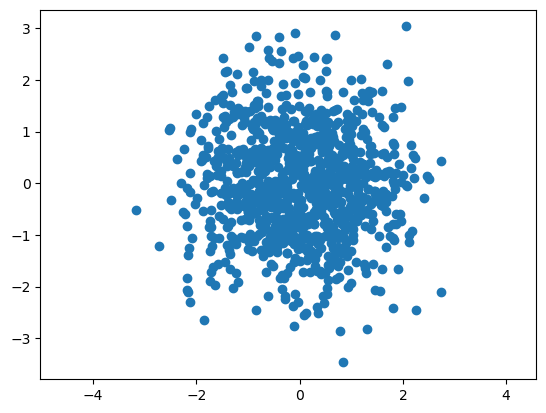

<Figure size 640x480 with 0 Axes>

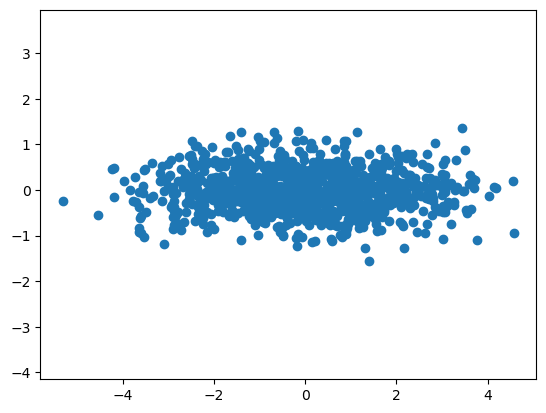

<Figure size 640x480 with 0 Axes>

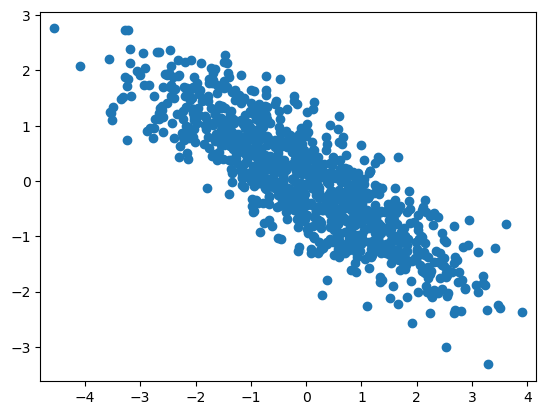

<Figure size 640x480 with 0 Axes>

In [3]:
n = 1000
W = np.random.normal(0, 1, (2, n))
Rx = np.array([[2, -1.2], [-1.2, 1]])
evals, evecs = np.linalg.eig(Rx)
evals = np.diag(evals)
X_tilde = np.dot(np.sqrt(evals), W)
print(X_tilde.shape)
print(evecs.shape)
X = np.dot(evecs, X_tilde)
# print(w)
plt.figure()
plt.scatter(W[0, :], W[1, :])
plt.axis('equal')
plt.savefig('w-2-1.png')
plt.show()
plt.clf()

plt.figure()
plt.scatter(X_tilde[0, :], X_tilde[1, :])
plt.axis('equal')
plt.savefig('x-tilde-2-1.png')
plt.show()
plt.clf()

plt.figure()
plt.scatter(X[0, :], X[1, :])
plt.axis('equal')
plt.savefig('x-2-1.png')
plt.show()
plt.clf()


## SECTION 2.2

[[ 2.06295536 -1.25657789]
 [-1.25657789  1.06953713]]
[[1.00000000e+00 9.32413868e-17]
 [9.15066634e-17 1.00000000e+00]]


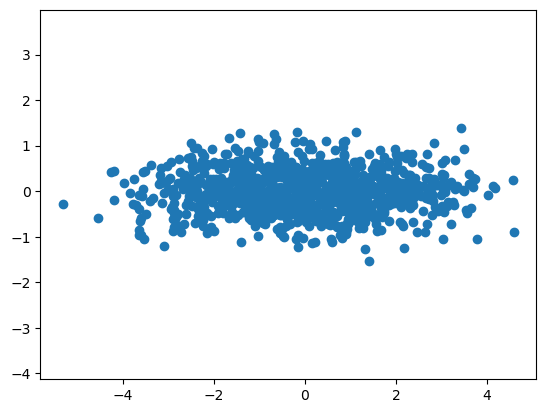

<Figure size 640x480 with 0 Axes>

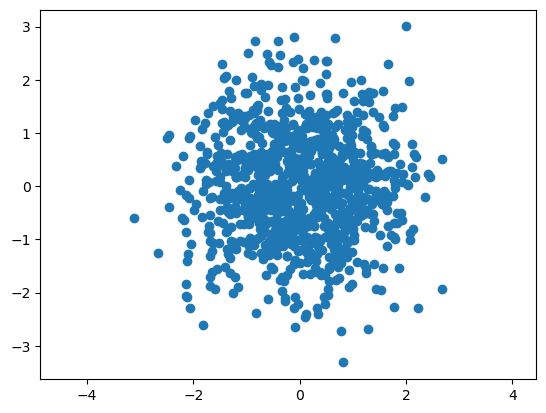

<Figure size 640x480 with 0 Axes>

In [5]:
u = np.mean(X, axis=1)
Z = np.copy(X)
for col in range(Z.shape[1]):
    Z[:, col] -= u
R_hat = 1/(n-1) * Z @ Z.T
print(R_hat)
evals, evecs = np.linalg.eig(R_hat)
evals_n12 = np.diag(1 / np.sqrt(evals))


X_tilde = evecs.T @ Z
# Switch with covariance mat (R_hat?) Double check in general
W = evals_n12 @ X_tilde
#W = R_hat @ X_tilde
uW = np.mean(W, axis=1)
Zw = np.copy(W)
for col in range(Zw.shape[1]):
    Zw[:, col] -= uW
R_hat_w = 1/(n-1) * Zw @ Zw.T
print(R_hat_w)


plt.figure()
plt.scatter(X_tilde[0, :], X_tilde[1, :])
plt.axis('equal')
plt.savefig('x-tilde-2-2.png')
plt.show()
plt.clf()

plt.figure()
plt.scatter(W[0, :], W[1, :])
plt.axis('equal')
plt.savefig('w-2-2.png')
plt.show()
plt.clf()

## SECTION 4

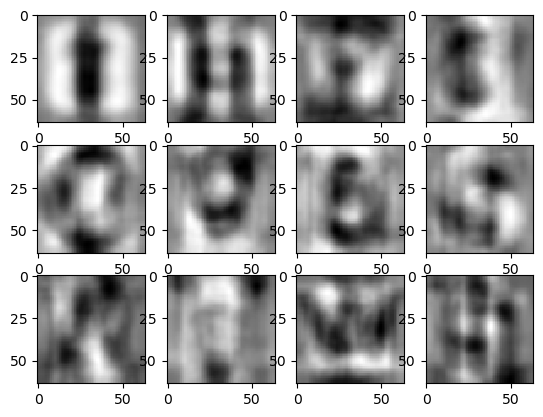

<Figure size 640x480 with 0 Axes>

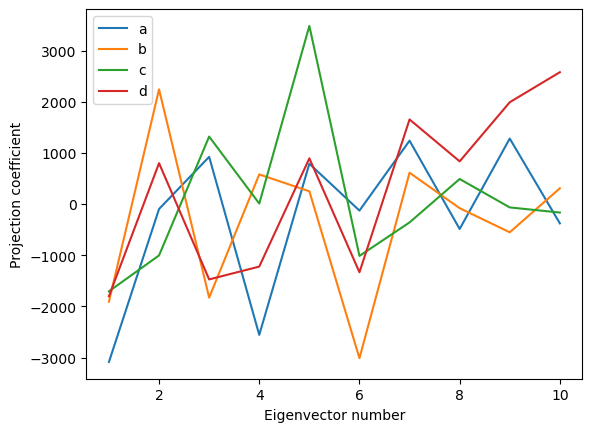

<Figure size 640x480 with 0 Axes>

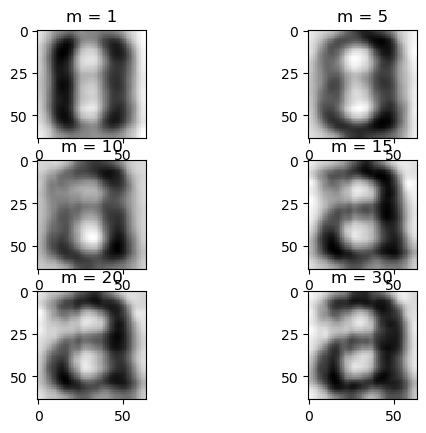

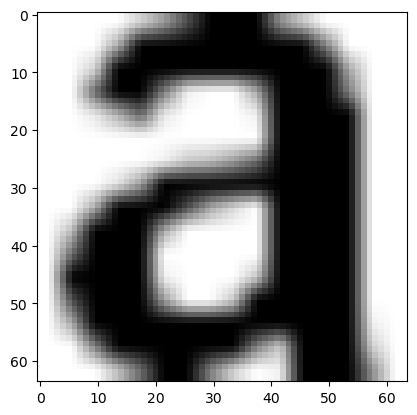

<Figure size 640x480 with 0 Axes>

In [6]:
X = read_data()
u = np.mean(X, axis=1)
n = X.shape[1]
for col in range(X.shape[1]):
    X[:, col] -= u
# X = X / np.sqrt(n)

# Find the Eigenvalues and Eigenvectors of the image covariance for this data set
# CHANGED TO N-1 BELOW FROM N, BUT DO NOT THINK IT MATTERS MUCH. DOUBLE CHECK.
Z = X / np.sqrt(n-1)
U, S, Vh = np.linalg.svd(Z)
eigvecs = U
eigvals = S**2

fig, axs = plt.subplots(3, 4)
for k in range(12):
    img = np.reshape(eigvecs[:, k], (64, 64))

    axs[k//4,k%4].imshow(img, cmap=plt.cm.gray, interpolation='none') 
    # axs[k//4,k%4].set_title([k])
plt.savefig('eigenimages.png')
plt.show()
plt.clf()


Y = U[:, 0:10].T @ X
plt.figure()
x = [i for i in range(1, 11)]
plt.plot(x, Y[0:10, 0])
plt.plot(x, Y[0:10, 1])
plt.plot(x, Y[0:10, 2])
plt.plot(x, Y[0:10, 3])
plt.legend(["a", "b", "c", "d"])
plt.xlabel("Eigenvector number")
plt.ylabel("Projection coefficient")
plt.savefig("projection-coefficients")
plt.show()
plt.clf()

fig, axs = plt.subplots(3, 2)
for i, m in enumerate([1, 5, 10, 15, 20, 30]):
    Y = U[:, 0:m].T @ X
    X_hat = U[:, 0:m] @ Y
    axs[i//2, i%2].imshow((X_hat[:, 0] + u).reshape(64, 64), cmap=plt.cm.gray, interpolation='none')
    axs[i//2, i%2].set_title(f"m = {m}")
plt.savefig("resynthesized-images.png")
plt.show()
plt.clf()
plt.imshow(X[:, 0].reshape(64, 64))
plt.imshow((X[:, 0] + u).reshape(64, 64), cmap=plt.cm.gray, interpolation='none')
plt.savefig("original-image.png")
plt.show()
plt.clf()


## SECTION 5.1

In [9]:
# Form transformation matrix A
A = U[:, 0:10]
# Transform X to lower dimensional represetnation Y (u already subtracted from X)
Y = A.T @ X
training_count = Y.shape[1] // 26
# Mean storage format: Each column is a letter's mean, there are 10 rows
mean = np.zeros([Y.shape[0], 26])
# Covariance storage format: First index chooses the covariance matrix of a letter
cov = np.zeros([26, Y.shape[0], Y.shape[0]])
for letter in range(26):
    for i in range(training_count):
        mean[:, letter] += Y[:, 26*i + letter]
    mean[:, letter] = mean[:, letter] / training_count

    for i in range(training_count):
        cov[letter] += np.dot((Y[:, 26*i + letter] - mean[:, letter]).reshape(Y.shape[0], 1), (Y[:, 26*i + letter] - mean[:, letter]).reshape(Y.shape[0], 1).T)
    cov[letter] = cov[letter] / (training_count-1)

Rows=64    # all images are 64x64
Cols=64
datachar='abcdefghijklmnopqrstuvwxyz'
n=len(datachar)  # total number of images
p=Rows*Cols   # number of pixels

tests = np.zeros((p, n))  # images arranged in columns of X
k = 0
for ch in datachar:
    fname = f'test_data/veranda/{ch}.tif'
    im = Image.open(fname)
    img = np.array(im)
    tests[:, k] = np.reshape(img, (1, p))
    k += 1
# USE THE TRAINING IMAGE MEAN, NOT THESE IMAGES' MEANS
# u = np.mean(tests, axis=1)
for col in range(tests.shape[1]):
    tests[:, col] -= u
low_dim_tests = A.T @ tests

cov_lam_k = np.zeros([26, Y.shape[0], Y.shape[0]])
cov_r_wc = np.zeros([26, Y.shape[0], Y.shape[0]])
cov_lam = np.zeros([26, Y.shape[0], Y.shape[0]])
cov_i = np.zeros([26, Y.shape[0], Y.shape[0]])
# Build up the various covariance matrices
for i in range(26):
    cov_lam_k[i] = np.diag(np.array([cov[i, j, j] for j in range(Y.shape[0])]))
    for k in range(26):
        cov_r_wc[i] += cov[k]
    cov_r_wc[i] = cov_r_wc[i] / 26
    cov_lam[i] = np.diag(np.array([cov_r_wc[i, j, j] for j in range(Y.shape[0])]))
    cov_i[i] = np.eye(Y.shape[0])

# Iterate over each covariance matrix we wish to test
for ident, cov_mat in enumerate((cov, cov_lam_k, cov_r_wc, cov_lam, cov_i)):
    print(f"RESULTS FOR COVARIANCE MATRIX {ident}:")
    # Iterate over the images we wish to test
    for i in range(26):
        # y = lower dimensional image of interest
        y = low_dim_tests[:, i].reshape(low_dim_tests.shape[0], 1)
        # Iterate over the means and covariance matrices
        best, best_k, first = 0, 0, True
        for k in range(26):
            uk = mean[:, k].reshape(mean.shape[0], 1)
            Rk = cov_mat[k]
            result = ((y - uk).T @ np.linalg.inv(Rk) @ (y - uk)) + math.log(np.linalg.det(Rk))
            if result < best or first:
                best, best_k, first = result, k, False
        # print(f"Character {datachar[i]} identified as {datachar[best_k]}")
        if datachar[i] != datachar[best_k]:
            print(f"Mismatch: Identified {datachar[i]} as {datachar[best_k]}")
    print()


print('done')

RESULTS FOR COVARIANCE MATRIX 0:
Mismatch: Identified d as a
Mismatch: Identified j as y
Mismatch: Identified l as i
Mismatch: Identified n as v
Mismatch: Identified p as e
Mismatch: Identified q as a
Mismatch: Identified u as a
Mismatch: Identified y as v

RESULTS FOR COVARIANCE MATRIX 1:
Mismatch: Identified i as l
Mismatch: Identified y as v

RESULTS FOR COVARIANCE MATRIX 2:
Mismatch: Identified g as q
Mismatch: Identified y as v

RESULTS FOR COVARIANCE MATRIX 3:
Mismatch: Identified f as t
Mismatch: Identified y as v

RESULTS FOR COVARIANCE MATRIX 4:
Mismatch: Identified f as t
Mismatch: Identified g as q
Mismatch: Identified y as v

done
